In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import glob

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
from skimage import img_as_ubyte

In [ ]:
path = "/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/*.*"
img_number = 1

/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013275.jpg


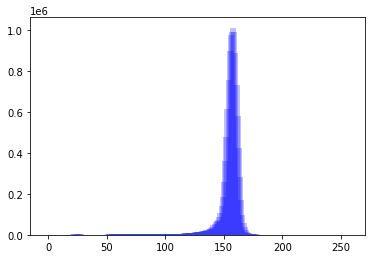

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


optimal threshold 120
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013271.jpg


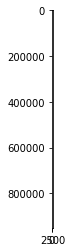

optimal threshold 135
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013274.jpg


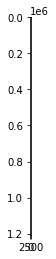

optimal threshold 112
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013291.jpg


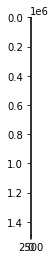

optimal threshold 129
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013288.jpg


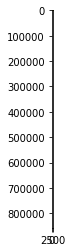

optimal threshold 120
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013287.jpg


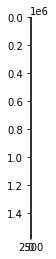

optimal threshold 130
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013277.jpg


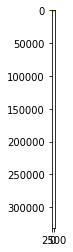

optimal threshold 95
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013302.jpg


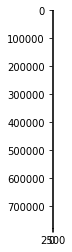

optimal threshold 136
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013304.jpg


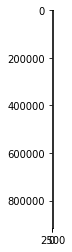

optimal threshold 122
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013294.jpg


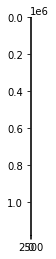

optimal threshold 114
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013306.jpg


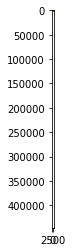

optimal threshold 103
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013310.jpg


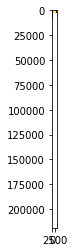

optimal threshold 142
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013311.jpg


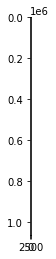

optimal threshold 121
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013314.jpg


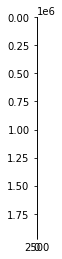

optimal threshold 116
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013315.jpg


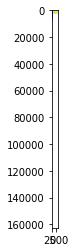

optimal threshold 121
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013325.jpg


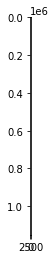

optimal threshold 134
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013321.jpg


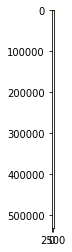

optimal threshold 128
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013320.jpg


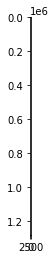

optimal threshold 138
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013319.jpg


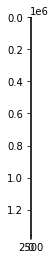

optimal threshold 121
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013329.jpg


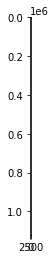

optimal threshold 142
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013326.jpg


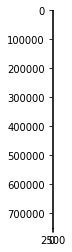

optimal threshold 139
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013330.jpg


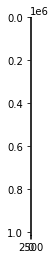

optimal threshold 120
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013333.jpg


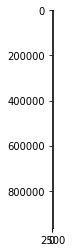

optimal threshold 89
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013334.jpg


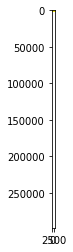

optimal threshold 189
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013335.jpg


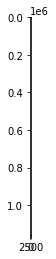

optimal threshold 128
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013342.jpg


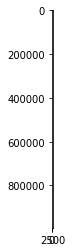

optimal threshold 122
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013341.jpg


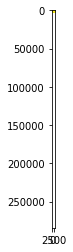

optimal threshold 126
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013340.jpg


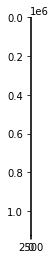

optimal threshold 105
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013356.jpg


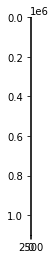

optimal threshold 138
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013355.jpg


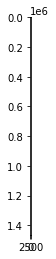

optimal threshold 129
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013346.jpg


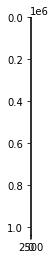

optimal threshold 103
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013365.jpg


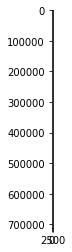

optimal threshold 115
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013359.jpg


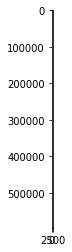

optimal threshold 126
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013360.jpg


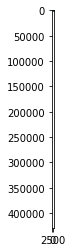

optimal threshold 113
/content/drive/MyDrive/isic-challenge-2018/ISIC2018_Task1-2_Training_Input/ISIC_0013364.jpg


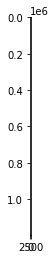

optimal threshold 111


KeyboardInterrupt: ignored

In [ ]:
for file in glob.glob(path):
  print(file)
  img = cv2.imread(file,0)


  threshold_values = {}
  h = [1]

  def Hist(img):
    row, col = img.shape
    y = np.zeros(256)
    for i in range(0,row):
        for j in range(0,col):
          y[img[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
    plt.show()
    return y

  def regenerate_img(img, threshold):
      row, col = img.shape
      y = np.zeros((row, col))
      for i in range(0,row):
          for j in range(0,col):
              if img[i,j] >= threshold:
                  y[i,j] = 255
              else:
                  y[i,j] = 0
      return y

    
  def countPixel(h):
      cnt = 0
      for i in range(0, len(h)):
          if h[i]>0:
            cnt += h[i]
      return cnt

  def wieght(s, e):
      w = 0
      for i in range(s, e):
          w += h[i]
      return w

  def mean(s, e):
      m = 0
      w = wieght(s, e)
      for i in range(s, e):
          m += h[i] * i
    
      return m/float(w)

  def variance(s, e):
      v = 0
      m = mean(s, e)
      w = wieght(s, e)
      for i in range(s, e):
          v += ((i - m) **2) * h[i]
      v /= w
      return v
            
  def threshold(h):
      cnt = countPixel(h)
      for i in range(1, len(h)):
          vb = variance(0, i)
          wb = wieght(0, i) / float(cnt)
          mb = mean(0, i)
        
          vf = variance(i, len(h))
          wf = wieght(i, len(h)) / float(cnt)
          mf = mean(i, len(h))
        
          V2w = wb * (vb) + wf * (vf)
          V2b = wb * wf * (mb - mf)**2
        
          fw = open("trace.txt", "a")
          fw.write('T='+ str(i) + "\n")

          fw.write('Wb='+ str(wb) + "\n")
          fw.write('Mb='+ str(mb) + "\n")
          fw.write('Vb='+ str(vb) + "\n")
        
          fw.write('Wf='+ str(wf) + "\n")
          fw.write('Mf='+ str(mf) + "\n")
          fw.write('Vf='+ str(vf) + "\n")

          fw.write('within class variance='+ str(V2w) + "\n")
          fw.write('between class variance=' + str(V2b) + "\n")
          fw.write("\n")
        
          if not math.isnan(V2w):
              threshold_values[i] = V2w


  def get_optimal_threshold():
      min_V2w = min(threshold_values.values())
      optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
      print ('optimal threshold', optimal_threshold[0])
      return optimal_threshold[0]



  h = Hist(img)
  threshold(h)
  op_thres = get_optimal_threshold()

  res = regenerate_img(img, op_thres)
  plt.imshow(res)

  cv2.imwrite("/content/drive/MyDrive/Otsu/Otsu"+str(img_number)+".jpg",res)
  img_number += 1
